IMPORTING THE LIBRARIES

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Setting visualization styles
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


LOADING THE DATASET

Summary Statistics:
                     TransactionDate     Quantity   TotalValue     Price_x  \
count                           1000  1000.000000  1000.000000  1000.00000   
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407   
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000   
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000   
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000   
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000   
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000   
std                              NaN     1.117981   493.144478   140.73639   

          Price_y  
count  1000.00000  
mean    272.55407  
min      16.08000  
25%     147.95000  
50%     299.93000  
75%     404.40000  
max     497.76000  
std     140.73639  


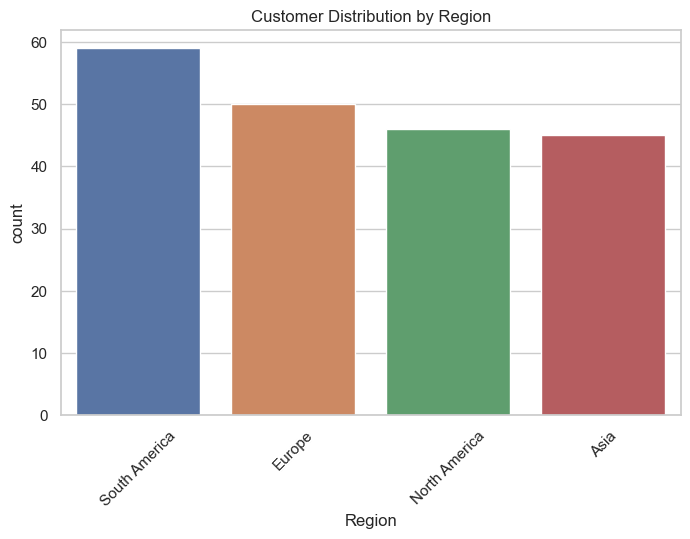

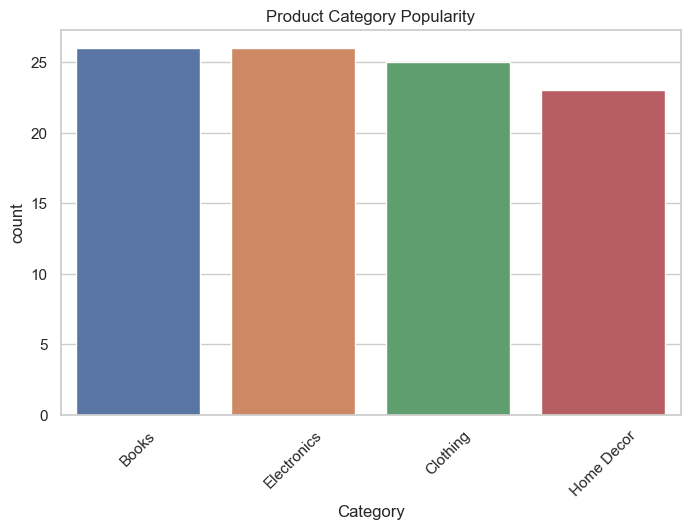

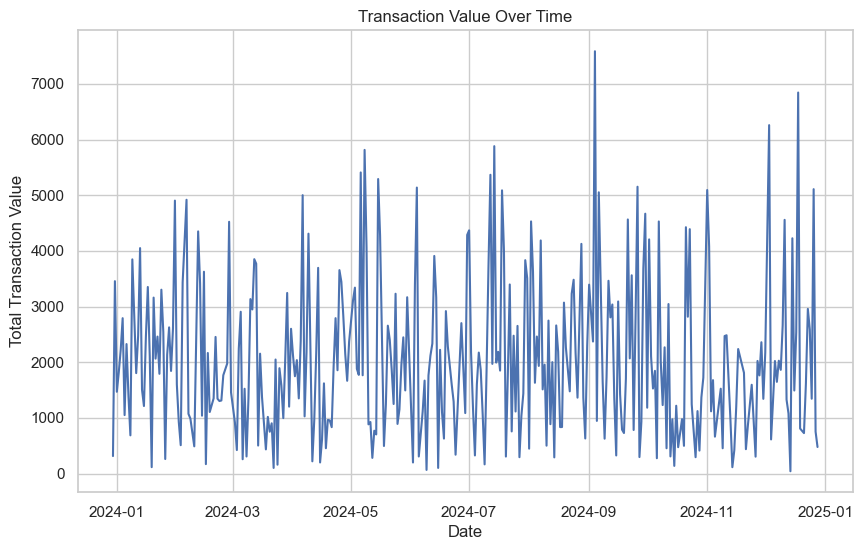

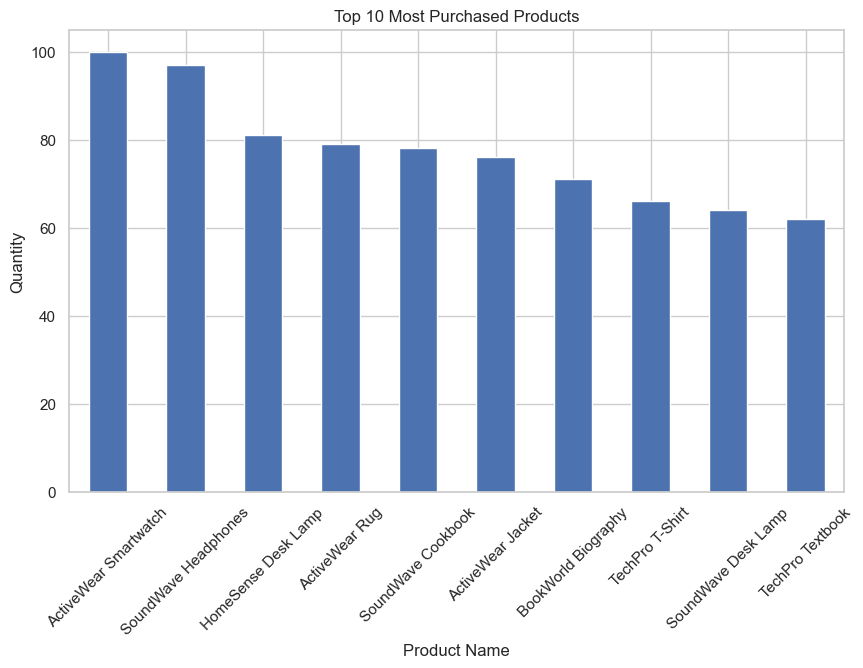

In [4]:
# Load the datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")



DATA CLEANING

Summary Statistics:
                     TransactionDate     Quantity   TotalValue     Price_x  \
count                           1000  1000.000000  1000.000000  1000.00000   
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407   
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000   
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000   
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000   
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000   
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000   
std                              NaN     1.117981   493.144478   140.73639   

          Price_y  
count  1000.00000  
mean    272.55407  
min      16.08000  
25%     147.95000  
50%     299.93000  
75%     404.40000  
max     497.76000  
std     140.73639  


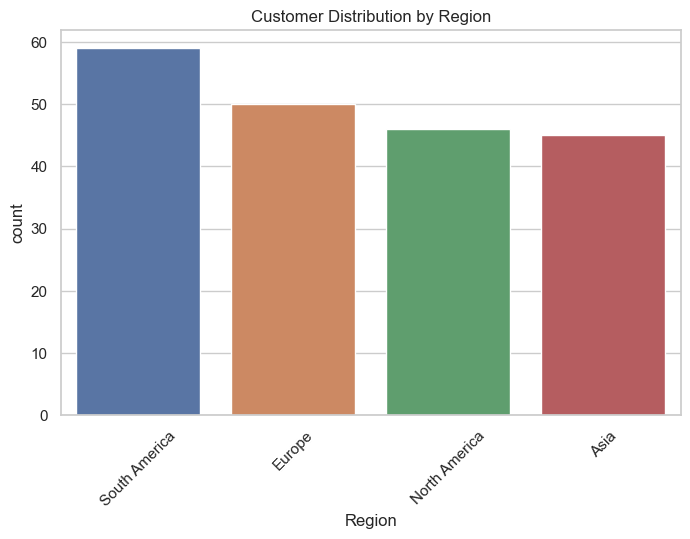

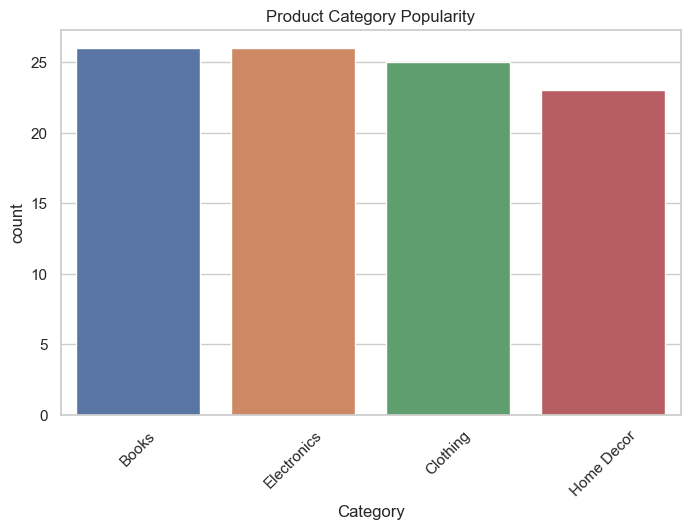

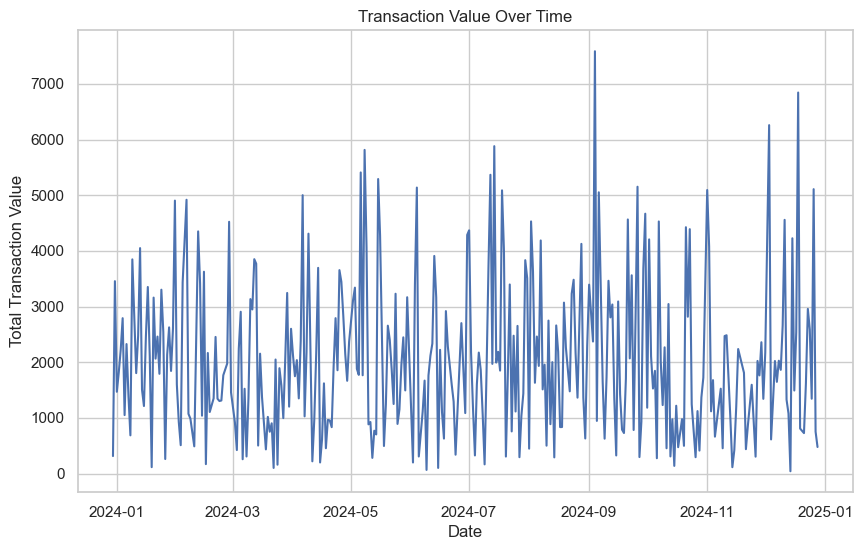

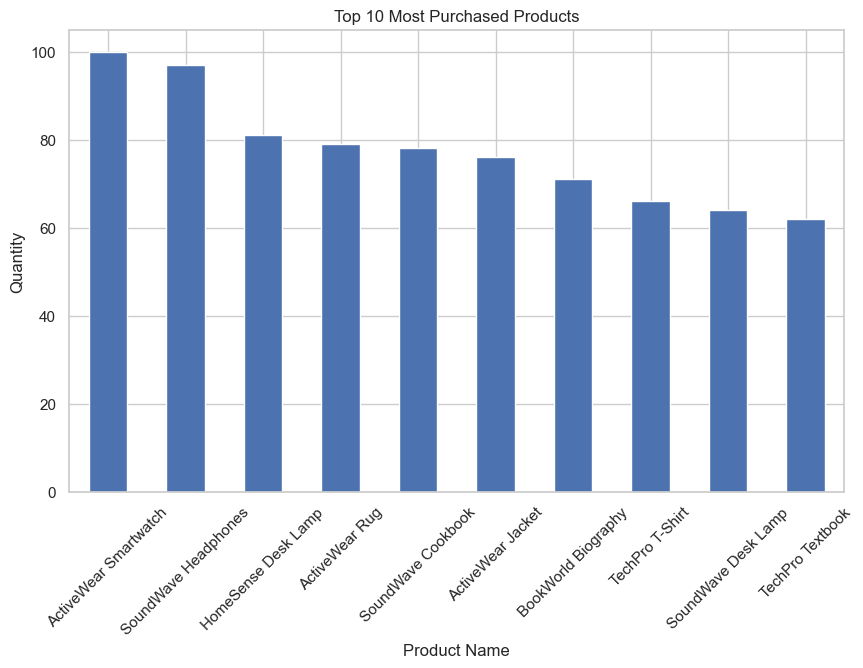

In [5]:

# Checking and filling missing values
customers['Region'].fillna("Unknown", inplace=True)



In [6]:
# Merging datasets
merged_data = pd.merge(transactions, customers, on="CustomerID")
merged_data = pd.merge(merged_data, products, on="ProductID")



In [7]:
# Data type conversions
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])



In [8]:
# Summary statistics
print("Summary Statistics:")
print(merged_data.describe())



Summary Statistics:
                     TransactionDate     Quantity   TotalValue     Price_x  \
count                           1000  1000.000000  1000.000000  1000.00000   
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407   
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000   
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000   
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000   
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000   
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000   
std                              NaN     1.117981   493.144478   140.73639   

          Price_y  
count  1000.00000  
mean    272.55407  
min      16.08000  
25%     147.95000  
50%     299.93000  
75%     404.40000  
max     497.76000  
std     140.73639  


EDA VISUALISATION

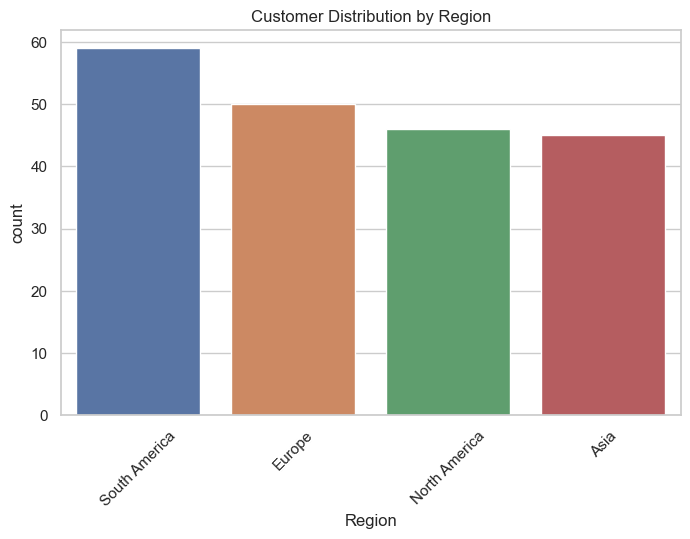

In [9]:

# 1. Customer distribution by region
plt.figure(figsize=(8, 5))
sns.countplot(data=customers, x="Region", order=customers["Region"].value_counts().index)
plt.title("Customer Distribution by Region")
plt.xticks(rotation=45)
plt.show()



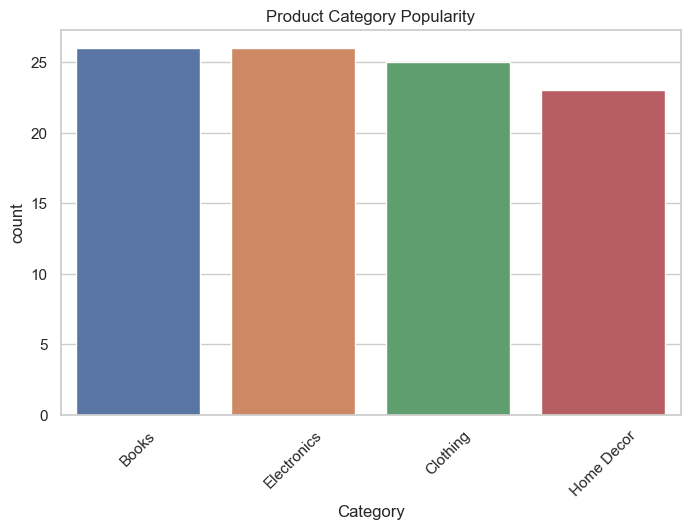

In [13]:
# 2. Product category popularity
plt.figure(figsize=(8, 5))
sns.countplot(data=products, x="Category", order=products["Category"].value_counts().index)
plt.title("Product Category Popularity")
plt.xticks(rotation=45)
plt.show()



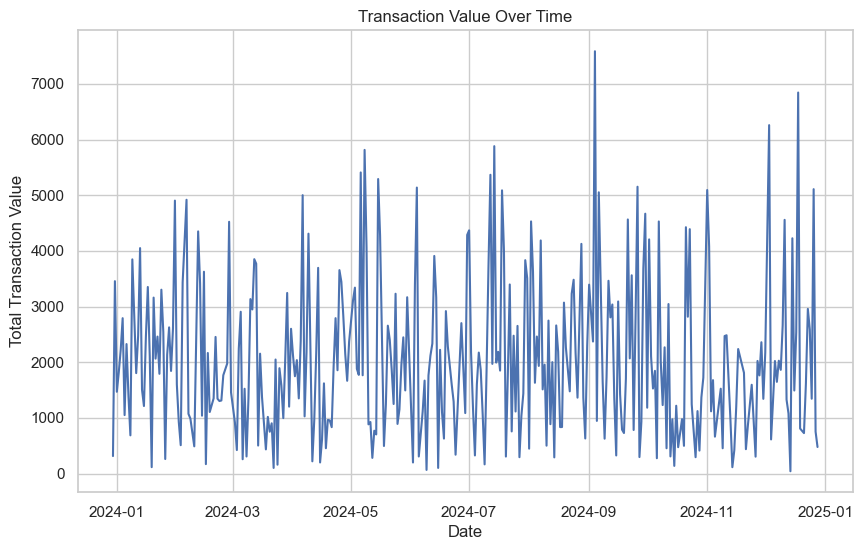

In [14]:
# 3. Trends in transaction value over time
transaction_trends = merged_data.groupby(merged_data['TransactionDate'].dt.date)['TotalValue'].sum()
transaction_trends.plot(kind='line', title="Transaction Value Over Time")
plt.ylabel("Total Transaction Value")
plt.xlabel("Date")
plt.show()



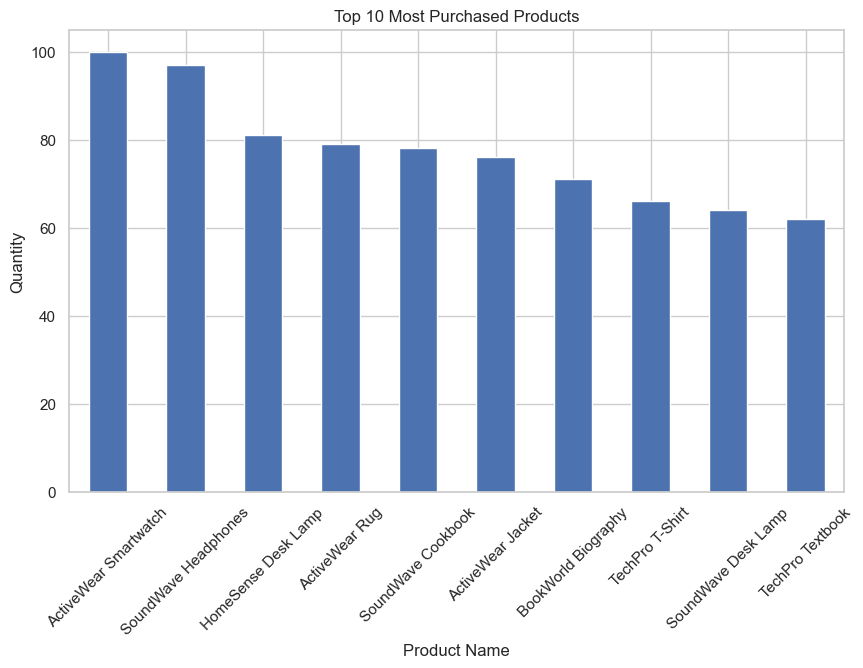

In [12]:
# 4. Most purchased products
top_products = merged_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', title="Top 10 Most Purchased Products")
plt.ylabel("Quantity")
plt.xlabel("Product Name")
plt.xticks(rotation=45)
plt.show()

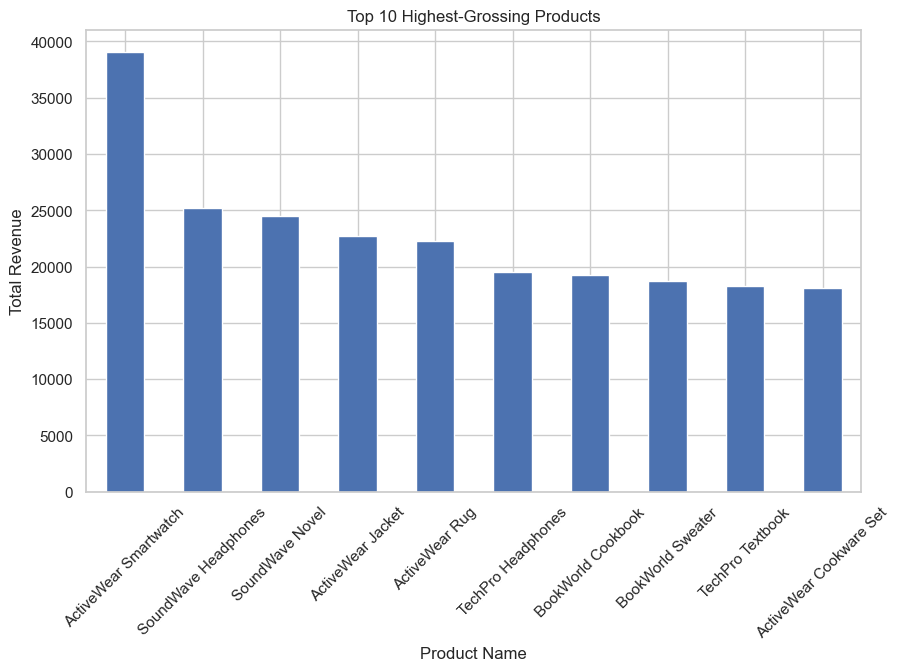

In [15]:
# 5. Highest-grossing products
top_grossing = merged_data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(10)
top_grossing.plot(kind='bar', title="Top 10 Highest-Grossing Products")
plt.ylabel("Total Revenue")
plt.xlabel("Product Name")
plt.xticks(rotation=45)
plt.show()



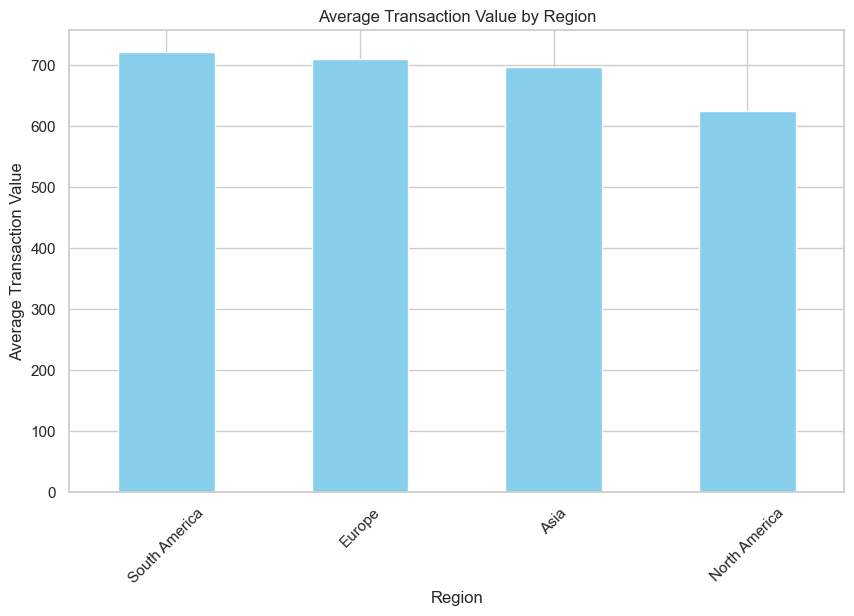

In [16]:
# 6. Average transaction value by region
region_avg_value = merged_data.groupby('Region')['TotalValue'].mean().sort_values(ascending=False)
region_avg_value.plot(kind='bar', title="Average Transaction Value by Region", color='skyblue')
plt.ylabel("Average Transaction Value")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.show()